In [1]:
# --------------------------------------------------------
# This file is for Chapter 3 Classification
# --------------------------------------------------------

# install kaggle package and fetch mnist dataset from kaggle --
# a free online platform owned by Google that hosts data science competitions, provides datasets, 
# and offers a collaborative environment for machine learning and AI projects. It’s one of
# the largest communities for data scientists and ML practitioners worldwide.



In [2]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset" shared by kaggle contributors
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)       

In [3]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = 'datasets/mnist/1/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

# show_images(images_2_show, titles_2_show)

In [4]:
# mnist-original dataset is downloaded from 
# https://www.kaggle.com/datasets/avnishnish/mnist-original?select=mnist-original.mat
# Thank kaggle contributor 
# This is a ".mat" file, in order to load this file in an ipynb you have to 
# use loadmat() function from scipy.io
# We'll use this dataset to learn this book

from scipy.io import loadmat
mnist = loadmat("datasets/mnist-original/mnist-original.mat")     # get mnist data
X = mnist_data = mnist["data"].T
y = mnist_label = mnist["label"][0]
# we finally get there!

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

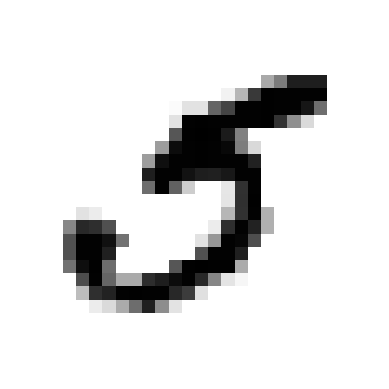

np.float64(5.0)

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]      # 30000 for four, 36000 for five, 40000 for six, 42000 for seven
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()
y[36000]

In [8]:
# get a traing set and a test set accordingly
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier( max_iter=5000, random_state = 42)
sgd_clf.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,5000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [12]:
sgd_clf.predict([some_digit])

array([5.])

In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20)

clf = SGDClassifier(loss="log_loss", max_iter=5000, tol=1e-3)
clf.fit(X_train, y_train)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,5000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [14]:
print(clf.score(X_test, y_test))


0.8945


In [15]:
# StratifiedKFold class is for stratified sampling to produce folds that contain 
# a representative ratio of each class. At each iteration the code creates a clone
# of the classifier, trains that clone on the training folds, and makes predications
# on the test fold. Than it counts the number of correct predictions and outputs
# the ratio of correct predictions.

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9647
0.96445
0.96355


In [16]:
# use cross_cal_score() to evaluate the SGDClassifier model by K-fold cross-validation
# with three folds. the K-fold cross-validation means splitting training set into K-folds,
# then making predictions and evaluating them on each fold using a model trained
# on the remaining folds.

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.9658 , 0.96565, 0.9675 ])

In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.90995, 0.90975, 0.90925])

In [18]:
# Confustion Matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [19]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_train_5, y_train_pred)

In [20]:
cmat

array([[54154,   425],
       [ 1596,  3825]])

In [21]:
y_train_perfect_predictions = y_train_5    # only have true positive and true negative predictions
confusion_matrix(y_train_5, y_train_perfect_predictions)  # get a perfect confusion matrix

array([[54579,     0],
       [    0,  5421]])

In [22]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# precision_score = TP / (TP + FP)
precision_score(y_train_5, y_train_pred)

0.9

In [23]:
# recall_score = TP / (TP + FN)
recall_score(y_train_5, y_train_pred)

0.7055893746541229

In [24]:
# accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy_score(y_train_5, y_train_pred)

0.9663166666666667

In [25]:
# F1 score = TP / (TP + (FN + FP)/2)
f1_score(y_train_5, y_train_pred)

0.7910247130596629

In [26]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([[-12204.46601035, -26233.63544834,  -6322.21142242,
         -5253.02247602, -16671.45841036,   4359.21441663,
        -26675.55297514, -18010.18736777, -11155.83638715,
        -10511.61541637]])

In [27]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([[False, False, False, False, False,  True, False, False, False,
        False]])

In [28]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)   # Rising the threshold decreases recall
y_some_digit_pred

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3,
                             method = "decision_function")

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

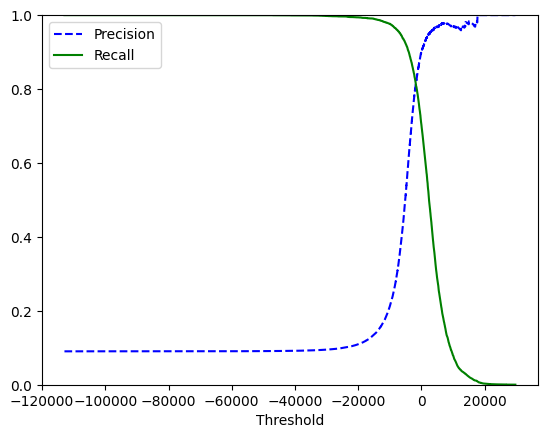

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [32]:
y_train_pred_90 = (y_scores > 4000)

In [33]:
precision_score(y_train_5, y_train_pred_90)

# if we use y_scores > 70000, - 70000 is way too high for MNIST scores, so we add zero_division parameter
#y_train_pred_90 = (y_scores > 70000)
#precision_score(y_train_5, y_train_pred_90, zero_division = 1)  

0.9627659574468085

In [34]:
recall_score(y_train_5, y_train_pred_90)

0.3672754104408781

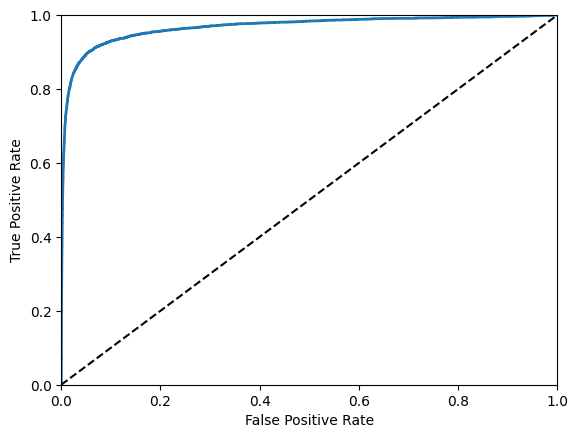

In [35]:
# the ROC(receiver operating characteristic) Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [36]:
# Roc Auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9679964115925928

ROC curve plotted and saved as roc_curve_logistic_regression.png


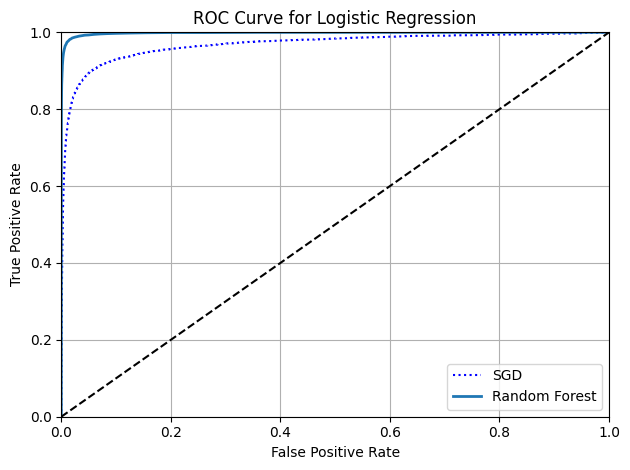

In [37]:
# train a RandomForestClassifier and compare its ROC curve and ROC AUC score to SGDClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3,
                                    method = "predict_proba")
y_scores_forest = y_probas_forest[:, 1]  # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "best")  # for loc supported values are 'best', 'upper right',
#'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right',
#'lower center', 'upper center', 'center'
#plt.show()
plt.title('ROC Curve for Logistic Regression')
plt.grid(True)
plt.tight_layout()

# Save the plot
output_path = "output/roc_curve_logistic_regression.png"
plt.savefig(output_path)

print("ROC curve plotted and saved as roc_curve_logistic_regression.png")

In [38]:
roc_auc_score(y_train_5, y_scores_forest)

0.9984262390306773

In [39]:
sgd_clf.fit(X_train, y_train)    # y_train, not y_train_5
sgd_clf.predict([some_digit])

array([5.])

In [40]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-12204.46601035, -26233.63544834,  -6322.21142242,
         -5253.02247602, -16671.45841036,   4359.21441663,
        -26675.55297514, -18010.18736777, -11155.83638715,
        -10511.61541637]])

In [41]:
np.argmax(some_digit_scores)

np.int64(5)

In [42]:
sgd_clf.classes_            # when a classifier is  trained, it stores the list of target classes
                            # in attribute classes_ array, ordered by value.

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [43]:
sgd_clf.classes_[5]

np.float64(5.0)

In [44]:
# use OneVsOne or OneVsAll functions to identify which strategy you want
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier( max_iter=2000, random_state = 42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [45]:
len(ovo_clf.estimators_)

45

In [46]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [47]:
forest_clf.predict_proba([some_digit])

array([[0.01, 0.  , 0.01, 0.03, 0.  , 0.92, 0.01, 0.  , 0.02, 0.  ]])

In [48]:
# evaluate these classifiers using cross-validation
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.8881 , 0.86585, 0.86815])

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.89965, 0.9052 , 0.89735])

In [50]:
# error analysis
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [51]:
conf_mx

array([[5595,    0,   17,    8,    7,   33,   32,    7,  223,    1],
       [   1, 6417,   42,   21,    3,   41,    5,    6,  193,   13],
       [  25,   29, 5267,   87,   68,   22,   63,   40,  346,   11],
       [  26,   21,  121, 5234,    1,  195,   25,   41,  397,   70],
       [   8,   13,   45,    9, 5230,   10,   38,   21,  316,  152],
       [  25,   19,   31,  149,   49, 4472,   73,   15,  525,   63],
       [  27,   18,   47,    3,   43,   85, 5549,    6,  140,    0],
       [  19,   15,   56,   25,   48,   11,    4, 5702,  183,  202],
       [  18,   61,   46,   98,    1,  121,   29,    8, 5423,   46],
       [  23,   22,   30,   58,  117,   37,    1,  165,  341, 5155]])

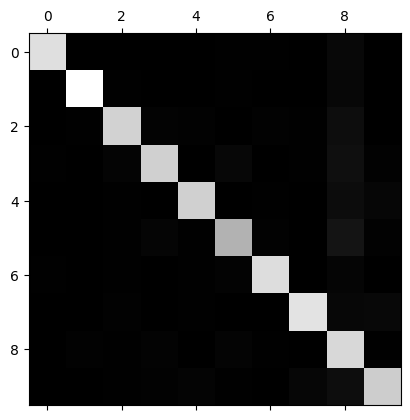

In [52]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [53]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

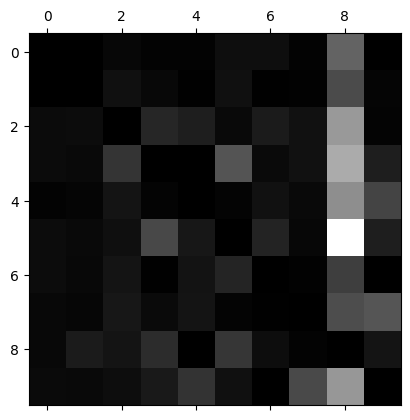

In [54]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [55]:
# this is a help function for plot_digits(), it's important for later cells
import numpy as np
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=10, **options):
    """
    Plot a grid of digit images from flattened vectors.
    
    Parameters:
    - instances: array-like, shape (n_samples, n_features)
      Each row is a flattened image (e.g., 28*28 = 784 features).
    - images_per_row: int, number of images per row in the grid.
    - options: passed to plt.imshow (e.g., cmap).
    """
    size = int(np.sqrt(instances.shape[1]))  # assumes square images
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    
    # pad with zeros if needed
    padded = np.concatenate([instances, np.zeros((n_empty, size*size))], axis=0)
    images = padded.reshape((n_rows, images_per_row, size, size))
    
    # stitch into one big image
    big_image = np.vstack([np.hstack(row) for row in images])
    plt.imshow(big_image, cmap="binary", **options)
    plt.axis("off")

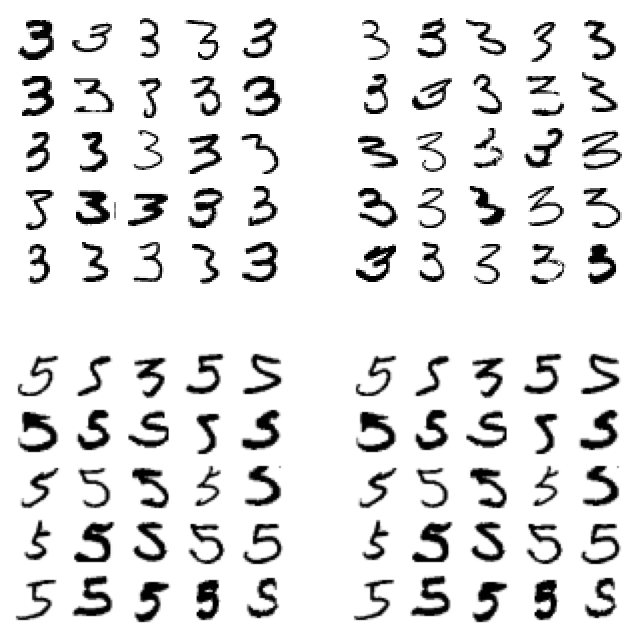

In [56]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]

plt.figure(figsize = (8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row = 5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row = 5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row = 5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row = 5)
plt.show()

In [57]:
# Multilabel Classification
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [58]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [59]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv = 3)
f1_score(y_train, y_train_knn_pred, average = "macro")

0.968194048562568

In [60]:
# extra code – shows that we get a negligible performance improvement when we
#              set average="weighted" because the classes are already pretty
#              well balanced.
# if y_train_knn_pred is 1D but you expect multilabel
# convert it to one-hot encoding

f1_score(y_train, y_train_knn_pred, average="weighted")

0.9683146897295172

In [61]:
from sklearn.multioutput import ClassifierChain
from sklearn.svm import SVC   # <-- import SVC

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

,estimator,SVC()
,order,None
,cv,3
,chain_method,'predict'
,random_state,42
,verbose,False
,base_estimator,'deprecated'
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [62]:
ClassifierChain(estimator=SVC(), cv=3, random_state=42)

,estimator,SVC()
,order,None
,cv,3
,chain_method,'predict'
,random_state,42
,verbose,False
,base_estimator,'deprecated'
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [63]:
chain_clf.predict([some_digit])

array([[0., 1.]])

In [64]:
# Multioutput Classification
# let's start by creating the training and test sets by taking the MNIST images
# and adding noise to their pixel intensities using NumPy's randint() function
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

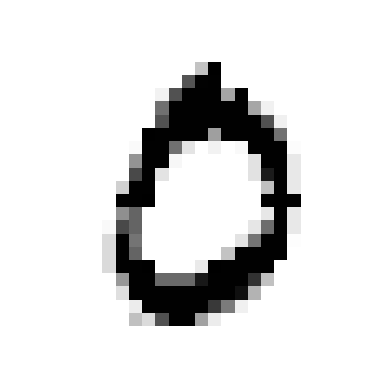

In [65]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digits(clean_digit)
plt.savefig("cleaned_digit_example_plot")  # extra code – saves Figure 3–13
plt.show()

In [66]:
# Exercises 1 An MNIST classifier with over 97% accuracy
knn_clf = KNeighborsClassifier()   # use KNeighborsClassifier
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9688

In [67]:
# try to use hyperparameters, only use 10,000 images to speed up the search
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

,estimator,KNeighborsClassifier()
,param_grid,"[{'n_neighbors': [3, 4, ...], 'weights': ['uniform', 'distance']}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,4


In [68]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [69]:
grid_search.best_score_

np.float64(0.9488999999999999)

In [70]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9714

In [71]:
# Exercise 2 Write a function to shift an MNIST image in any direction
# (left, right, up, down) by one pixel
# we use shift() in scipy.ndimage
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

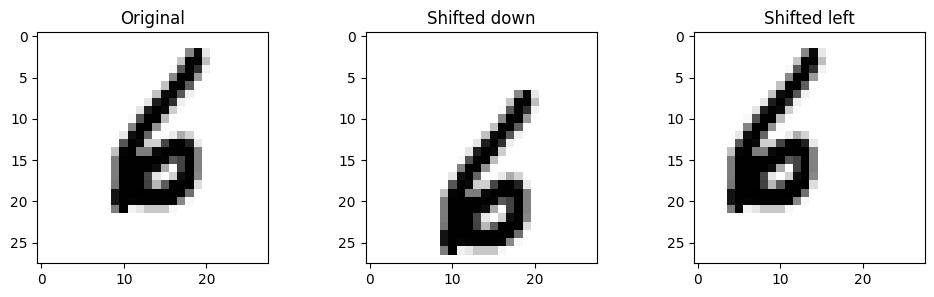

In [72]:
image = X_train[1000]  # some random digit to demo
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.show()

In [73]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [74]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [75]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [76]:
knn_clf.fit(X_train_augmented, y_train_augmented)

,n_neighbors,4
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [77]:
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy

0.9763

In [78]:
error_rate_change = (1 - augmented_accuracy) / (1 - tuned_accuracy) - 1
print(f"error_rate_change = {error_rate_change:.0%}")

error_rate_change = -17%


In [86]:
# Exercise 3 Tackle the Titanic dataset. A great place to start is on Kaggle
# Download the data
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

In [87]:
train_data, test_data = load_titanic_data()

In [88]:
# see training data structure
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [90]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [91]:
train_data[train_data["Sex"]=="female"]["Age"].median()

np.float64(27.0)

In [92]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [94]:
train_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [95]:
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [96]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [98]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [99]:
cat_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),    
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

In [100]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [101]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]], shape=(891, 12))

In [102]:
y_train = train_data["Survived"]

In [103]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [104]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = forest_clf.predict(X_test)

In [105]:
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

np.float64(0.8137578027465668)

In [106]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

np.float64(0.8249313358302123)

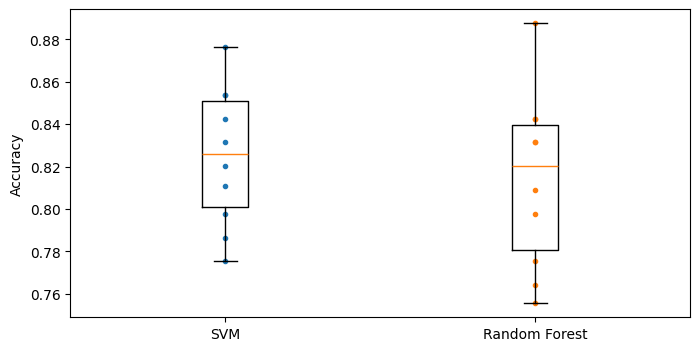

In [108]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], tick_labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy")
plt.show()

In [109]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [110]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(
    ['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [ ]:
# Exercise 4 Build a spam classifier
# Download examples of spam and ham from Apache Spam Assassin's public datasets

In [168]:
# Download latest version from kaggle
import shutil
import kagglehub

# Download into KaggleHub cache
cache_path = kagglehub.dataset_download("beatoa/spamassassin-public-corpus")

# Copy into your desired folder
target_path = "./datasets/spamassassin"
shutil.copytree(cache_path, target_path, dirs_exist_ok=True)

print("Dataset copied to:", target_path)


Dataset copied to: ./datasets/spamassassin


In [169]:
def fetch_spam_data():
    spam_path = Path() / "datasets" / "spamassassin"
    for dir_name in ("easy_ham/easy_ham", "hard_ham/hard_pam","spam_2/spam_2"):
        if not (spam_path / dir_name).is_dir():
            path = (spam_path)
    return [spam_path / dir_name for dir_name in ("easy_ham/easy_ham", "hard_ham/hard_ham", "spam_2/spam_2")]

In [170]:
easy_ham_dir, hard_ham_dir, spam_dir = fetch_spam_data()

In [171]:
easy_ham_filenames = [f for f in sorted(easy_ham_dir.iterdir()) if len(f.name) > 20]
hard_ham_filenames = [f for f in sorted(hard_ham_dir.iterdir()) if len(f.name) > 20]
spam_filenames = [f for f in sorted(spam_dir.iterdir()) if len(f.name) > 20]

In [172]:
len(easy_ham_filenames)

2551

In [173]:
len(hard_ham_filenames)

250

In [174]:
len(spam_filenames)

1396